In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Activation, Dropout, Flatten, Dense
import json
import random as rn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data_dir='./data'
num_classes = 13
batch_size = 32
image_size = (224, 224)
inputs = tf.keras.Input(shape=(224, 224, 3))

In [4]:

def generate_datasets(data_dir, validation_split=0.2):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=42,
    labels="inferred",
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size)

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset="validation",
        seed=42,
        labels="inferred",
        label_mode="categorical",
        image_size=image_size,
        batch_size=batch_size)
    return train_ds, val_ds

In [13]:
def augment_dataset(train_dataset, validation_dataset):
    def augment_images(image, label):
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        # image = tf.image.random_brightness(image, 0.2)
        # image = tf.image.random_contrast(image, 0.5, 1.5)
        image = tf.image.random_saturation(image, 1.2, 1.8) # make colors more vibrant
        image = tf.image.random_hue(image, 0.5)
        # image = tf.image.random_resized_crop(image, size, scale=(0.08, 1.0), ratio=(0.75, 1.33), seed=None, name=None)
        return image, label

    aug_train_ds = train_dataset.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
    aug_val_ds = validation_dataset.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)

    image, _ = next(iter(aug_train_ds.take(1)))
    # peek
    plt.imshow(image[1])
    plt.show()
    
    return aug_train_ds, aug_val_ds

In [60]:
# The Nitin Models\

def create_nitin_v2():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.35)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='nitinv2')



def create_nitin_v3():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='nitinv3')

def create_nitin_v4():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='nitinv4')



def create_nitin_adadelta():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='nitin')

In [56]:
# Training
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.85:
            self.model.save("./archive/{}/{}_{}.h5".format(model.name, model.name, epoch))
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()


def train_model(model, train_ds, val_ds, optimizer, optimizer_name):
    
    name = f'{model.name}_{optimizer_name}'
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy',
                        'MeanSquaredError',
                        'AUC',])

    history = model.fit(
        train_ds,
        epochs=150,
        validation_data=val_ds,
        callbacks=[callback],
        verbose=1)

    with open(f'./archive/{name}-history.json', 'w') as f:
        json.dump(history.history, f)


def train_models(models, train_ds, val_ds, optimizer, optimizer_name):
    for model in models:
        train_model(model(), train_ds, val_ds, optimizer, optimizer_name)

In [11]:
optimizers = {
# 'sgd': tf.keras.optimizers.SGD(learning_rate=0.001),  # no bueno
'adadelta': tf.keras.optimizers.Adadelta(learning_rate=1.0), # not bad. overfit early, need to do l1/l2 reg.
# 'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=0.001), # no beuno
'nadam': tf.keras.optimizers.Nadam(learning_rate=0.001),
'adam': tf.keras.optimizers.Adam(learning_rate=0.001)}


def test_optimizers(model):
    for k, v in optimizers.items():
        train_model(model,k,v)

Found 2643 files belonging to 13 classes.
Using 2115 files for training.
Found 2643 files belonging to 13 classes.
Using 528 files for validation.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


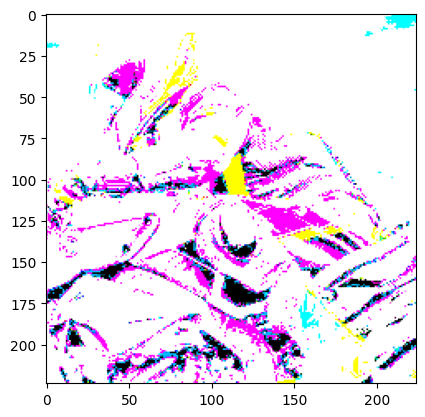

Epoch 1/150
67/67 [==============================] - 9s 114ms/step - loss: 2.9339 - accuracy: 0.1929 - mean_squared_error: 0.0754 - auc: 0.6347 - val_loss: 27.3411 - val_accuracy: 0.0511 - val_mean_squared_error: 0.1453 - val_auc: 0.4853
Epoch 2/150
67/67 [==============================] - 7s 99ms/step - loss: 2.2622 - accuracy: 0.2624 - mean_squared_error: 0.0660 - auc: 0.7407 - val_loss: 17.6110 - val_accuracy: 0.1402 - val_mean_squared_error: 0.1086 - val_auc: 0.5180
Epoch 3/150
67/67 [==============================] - 7s 99ms/step - loss: 2.1249 - accuracy: 0.2950 - mean_squared_error: 0.0632 - auc: 0.7743 - val_loss: 8.2846 - val_accuracy: 0.1155 - val_mean_squared_error: 0.1081 - val_auc: 0.5434
Epoch 4/150
67/67 [==============================] - 7s 99ms/step - loss: 2.0276 - accuracy: 0.3357 - mean_squared_error: 0.0612 - auc: 0.8025 - val_loss: 7.3668 - val_accuracy: 0.0720 - val_mean_squared_error: 0.1217 - val_auc: 0.5155
Epoch 5/150
67/67 [==============================] - 

In [61]:
t_ds, v_ds = generate_datasets(data_dir)
train_ds, val_ds = augment_dataset(t_ds, v_ds)

models = {
    # "basic_model_v1`": create_basic_model(),
    # "colin_v1": create_colin_v1,
    # "colin_v1": create_colin_v2,
    # "colin_v1": create_colin_v3,
    # "colin_v1": create_colin_v4,
    # "colin_v1": create_colin_v5,
    # "grant_v1": create_grant_v1,
    # "nitin_v1": create_nitin_v1(),
    # "nitin_v2": create_nitin_v2,
    # "nitin_v3": create_nitin_v3,
    # "nitin_v4": create_nitin_v4,
    "nitin": create_nitin_adadelta    
    
    # "grant_v1": create_grant_v2        
}

# train_models(models.values(), train_ds, val_ds, optimizers.get('adam'), 'adam')
# train_models(models.values(), train_ds, val_ds, optimizers.get('nadam'), 'nadam')
train_models(models.values(), train_ds, val_ds, optimizers.get('adadelta'), 'adadelta')


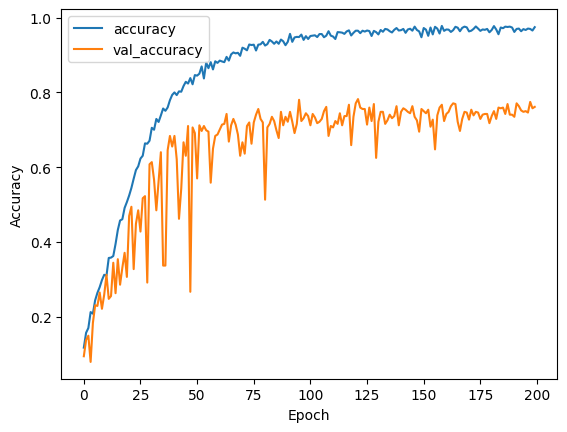

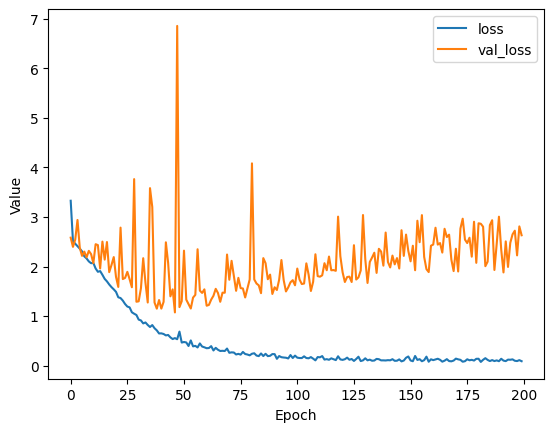

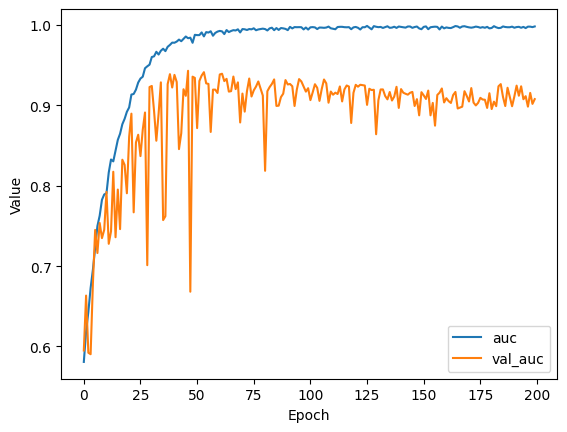

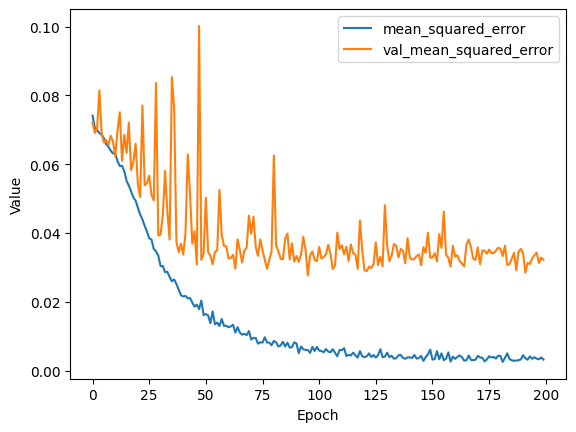

In [54]:
def plot_history(model_history_file_path):
    with open(model_history_file_path, "r") as file:
        data = json.load(file)
    plt.plot(data['accuracy'], label="accuracy")
    plt.plot(data['val_accuracy'], label='val_accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    plt.plot(data['loss'], label='loss')
    plt.plot(data['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    plt.plot(data['auc'], label='auc')
    plt.plot(data['val_auc'], label='val_auc')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    plt.plot(data['mean_squared_error'], label='mean_squared_error')
    plt.plot(data['val_mean_squared_error'], label='val_mean_squared_error')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

plot_history("./archive/colin_adadelta-history.json")

In [ ]:
# ugly predict
# get_classes = tf.keras.preprocessing.image_dataset_from_directory(
#     "./data/",
#     label_mode='categorical',
#     image_size=image_size,
#     batch_size=batch_size)

# dir2predict = rn.choice(get_classes.class_names)
# print("class to predict: {}".format(dir2predict))

# photos_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     f"./data/{dir2predict}/",
#     label_mode=None,
#     image_size=image_size,
#     batch_size=batch_size)

# model = tf.keras.models.load_model('./archive/colin_v1/colin_v1_73.h5')
# # model.summary()
# # Make predictions on the images in the dataset
# predictions = model.predict(photos_ds)
# # print(predictions)

# class_indices = np.argmax(predictions, axis=-1)

# class_labels = list(get_classes.class_names)

# predicted_classes = [class_labels[index] for index in class_indices]
# # print(predicted_classes)
# x = [x for x in predicted_classes if dir2predict in x]
# print(f'count correct: {len(x)}')
# print(f'count total: {len(predicted_classes)}')
# print(f'percent correct: {len(x)/len(predicted_classes)}')

Found 2643 files belonging to 13 classes.
class to predict: CMP_Black_Daytona_21
Found 218 files belonging to 1 classes.
7/7 [==============================] - 1s 94ms/step
count correct: 176
count total: 218
percent correct: 0.8073394495412844
